In [13]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing
from sklearn.model_selection import train_test_split


import lightgbm as lgb # model that is used

pd.set_option('display.max_colwidth', None)

beta = 1 / (2**0.5) # used for model evaluation

In [14]:
# loading of datasets
train_data = pd.read_csv('../../../Data-Preparation/sentiment140/traindata_without_stopwords_preprocessed.csv')
dev_data = pd.read_csv('../../../Data-Preparation/sentiment140/devdata_without_stopwords_preprocessed.csv')

0                        Rise shining lol mins later planned rush door time
1                                     2nd interview today looking promising
2                                                                 feel pain
3          4yr old son went exploring amp hiking today found Luv amphibians
4                                                lonely housemates gone pub
                                         ...                               
1279995                               held together bubblegum amp blessings
1279996                                                          Heehee one
1279997                                 welcome change mind though let know
1279998                                                    BET Bring Backup
1279999                    Windows Linux box Installing BSD Apple iPod Yeah
Name: Text, Length: 1280000, dtype: object

In [15]:
# load the vectorizer from file
with open('../../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

TfidfVectorizer()


In [ ]:
# Extraction of features and labels
feature_train = train_data['Text'].astype(str)
label_train = train_data['target']

feature_dev = dev_data['Text'].astype(str)
label_dev = dev_data['target']

### Vectorization of the Data

Vectorization is a necessary step, as machine learning models are only capable of processing numerical data. 

In [19]:
X_train = loaded_vectorizer.transform(feature_train)
X_dev = loaded_vectorizer.transform(feature_dev)

### without Hyperparametertuning

In [20]:
model1 = lgb.LGBMClassifier()
model1.fit(X_train, label_train)

[LightGBM] [Info] Number of positive: 486400, number of negative: 486400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 22.919331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316039
[LightGBM] [Info] Number of data points in the train set: 972800, number of used features: 18274
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [21]:
train_data['Prediction1'] = model1.predict(X_train)
train_data.head()

,Text,target,Prediction1
71752,wow wise fear elevators incredible love demi,0,4
58985,hahaha bored haha plane crash scary,0,0
896020,Sure following,4,4
182514,itunes say download OS3 yet mine says OS date,0,0
357069,French Mauritian speak French Good luck learning,0,4


### with Hyperparametertuning

It was actively decided against the use of automated searches for the best hyperparameters, as this would require too much computational effort due to the size of the data set. We were unable to provide this computing power. 

In [22]:
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.05],
#     'num_leaves': [50, 100, 300],
#     'max_depth': [5, 10, 20],
#     'min_child_samples': [5, 10, 20]
# }

# model = lgb.LGBMClassifier()

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# grid_search.fit(feature_dev, label_dev)


# print('Best hyperparameters:', grid_search.best_params_)


manual tuning using the parameters listed for better accuracy on :
https://lightgbm.readthedocs.io/en/stable/Parameters-Tuning.html#for-better-accuracy


In [23]:
#accuracy is 0.78
#ca. 2min 40s model22.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=100,
#     max_bin=512,
#     learning_rate=0.05,
#     num_iterations=200,
# )


#acuracy is 0.75   
#ca. 11min 16s model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )


# nur noch 0.71 accuracy
#ca. 20min model2.fit

# model2 = lgb.LGBMClassifier(
#     # num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )


# nur noch 0.74 accuracy
#ca. 2min 14 model2.fit

# model2 = lgb.LGBMClassifier(
#     boosting_type='dart',
# )


# auch 0.78
#ca. 2min 19 model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=100,
# )



# accuracy 0.79
#ca. 2min 47 model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=200,
# )



# accuracy only 0.74
# model2 = lgb.LGBMClassifier(
#     boosting = 'dart',
# )


# accuracy 0.76
# model = lgb.LGBMClassifier(
#     max_bin=2048,
# )



# accuracy 0.72
# model2 = lgb.LGBMClassifier(
#     learning_rate=0.05, boosting_type= 'gbdt',
#     objective='binary',
#     metric = ['auc', 'binary_logloss'],
#     num_leaves=100, max_depth=10,
# )


# accuracy 0.79
# ca. 4min 37 model.fit

# größere num_leaves bringt bessere nichts mehr

model2 = lgb.LGBMClassifier(
    num_leaves=300,
)

In [24]:
model2.fit(X_dev, label_dev)

[LightGBM] [Info] Number of positive: 153600, number of negative: 153600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.480600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279239
[LightGBM] [Info] Number of data points in the train set: 307200, number of used features: 8175
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

In [25]:
y_pred_lgbm = model2.predict(X_train)

In [26]:
# calculate metrics
accuracy = accuracy_score(label_train, y_pred_lgbm)
precision = precision_score(label_train, y_pred_lgbm, pos_label=4)
recall = recall_score(label_train, y_pred_lgbm, pos_label=4)
f1 = f1_score(label_train, y_pred_lgbm, pos_label=4)
f_beta = fbeta_score(label_train, y_pred_lgbm, beta=beta, pos_label=4)

# visualize metrics
print('LGBM with Hyperparametertuning')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")
print()

LGBM with Hyperparametertuning
Accuracy: 0.76
Precision: 0.75
Recall: 0.80
F1 Score: 0.77
F-beta Score (beta=0.7071067811865475): 0.7639389894240839



## Best Model

In [28]:
train_data['Prediction2'] = model2.predict(X_train)
train_data.head()

,Text,target,Prediction1,Prediction2
71752,wow wise fear elevators incredible love demi,0,4,4
58985,hahaha bored haha plane crash scary,0,0,4
896020,Sure following,4,4,4
182514,itunes say download OS3 yet mine says OS date,0,0,0
357069,French Mauritian speak French Good luck learning,0,4,4


### evaluation

In [33]:
# calculate metrics
accuracy = accuracy_score(train_data['target'], train_data['Prediction1'])
precision = precision_score(train_data['target'], train_data['Prediction1'], pos_label=4)
recall = recall_score(train_data['target'], train_data['Prediction1'], pos_label=4)
f1 = f1_score(train_data['target'], train_data['Prediction1'], pos_label=4)
f_beta = fbeta_score(train_data['target'], train_data['Prediction1'],  beta=beta, pos_label=4)

# visualize metrics
print('LGBM without Hyperparametertuning')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")
print()



# calculate metrics
accuracy_2 = accuracy_score(train_data['target'], train_data['Prediction2'])
precision_2 = precision_score(train_data['target'], train_data['Prediction2'], pos_label=4)
recall_2 = recall_score(train_data['target'], train_data['Prediction2'], pos_label=4)
f1_2 = f1_score(train_data['target'], train_data['Prediction2'], pos_label=4)
f_beta = fbeta_score(train_data['target'], train_data['Prediction2'],  beta=beta, pos_label=4)

# visualize metrics
print('LGBM with Hyperparametertuning')
print(f'Accuracy: {accuracy_2:.2f}')
print(f'Precision: {precision_2:.2f}')
print(f'Recall: {recall_2:.2f}')
print(f'F1 Score: {f1_2:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

LGBM without Hyperparametertuning
Accuracy: 0.74
Precision: 0.71
Recall: 0.82
F1 Score: 0.76
F-beta Score (beta=0.7071067811865475): 0.7398813347244448

LGBM with Hyperparametertuning
Accuracy: 0.76
Precision: 0.75
Recall: 0.80
F1 Score: 0.77
F-beta Score (beta=0.7071067811865475): 0.7639389894240839


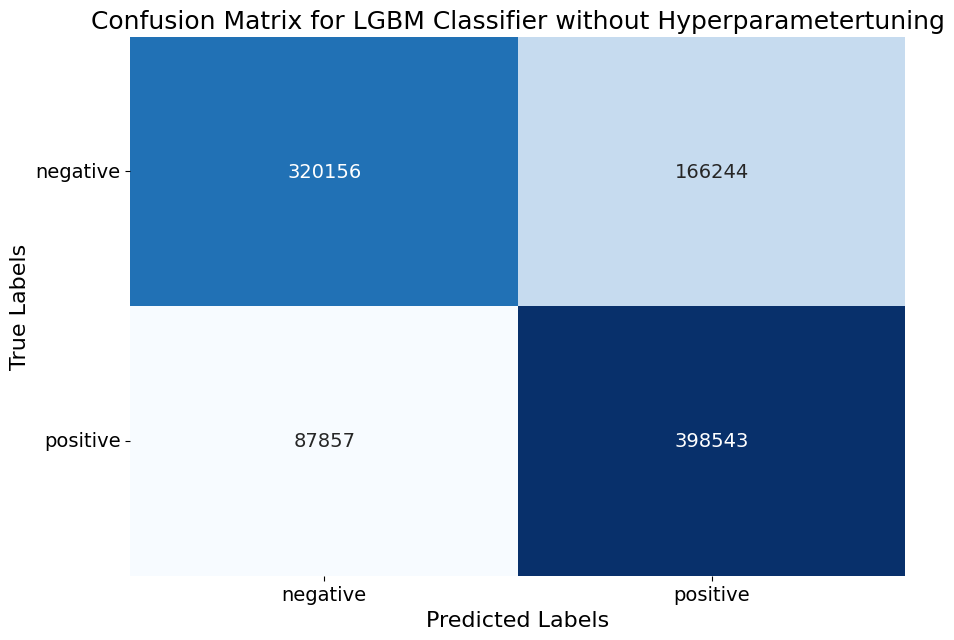

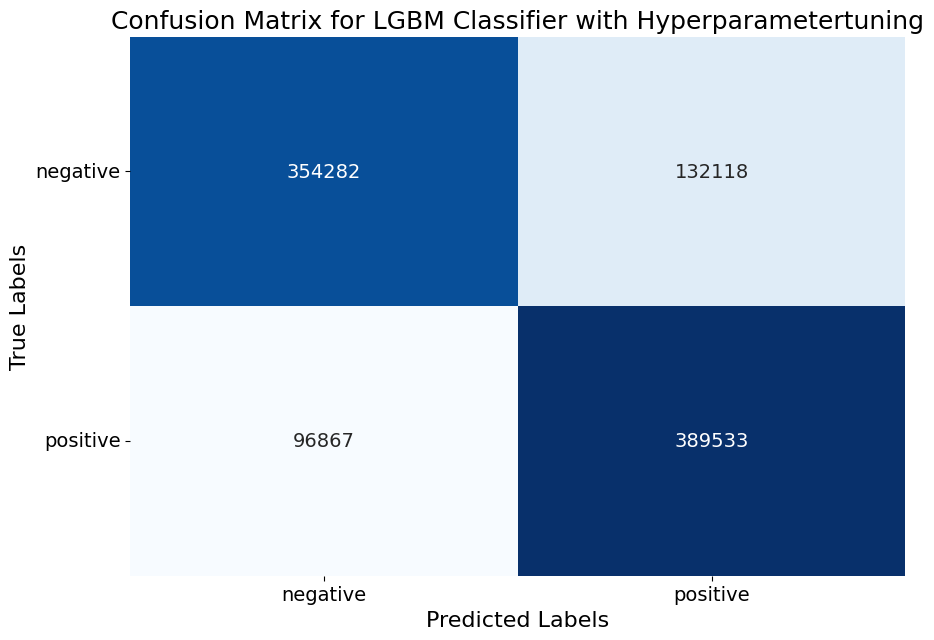

In [34]:
cm_nb = confusion_matrix(train_data['target'], train_data['Prediction1'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier without Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()


cm_nb = confusion_matrix(train_data['target'], train_data['Prediction2'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier with Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()

### export better model

In [35]:
# model2 (with Hyperparametertuning) is exported since accuracy is higher
with open('lgbm_model_without_stopwords.pkl', 'wb') as file:
    pickle.dump(model2, file)